In [1]:
from pydataset import data # importing librabries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import env
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from wrangle import wrangle_zillow
from explore import plot_variable_pairs
from explore import plot_categorical_and_continuous_vars

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

In [2]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
df = wrangle_zillow()

In [4]:
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips,yearbuilt
0,4,2.0,1696,252549,6037,1960
1,3,2.0,1470,512000,6037,1957
2,3,2.0,1450,229856,6037,1957
3,3,2.0,1694,294026,6037,1957
4,4,3.0,2578,426407,6037,1963
...,...,...,...,...,...,...
56073,5,4.0,2917,757000,6111,2001
56074,4,3.0,2474,609271,6111,1998
56075,5,3.0,2891,474981,6111,1998
56077,2,2.0,1464,521000,6111,1990


In [5]:
df.shape

(49668, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49668 entries, 0 to 56078
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    49668 non-null  int64  
 1   bathroomcnt                   49668 non-null  float64
 2   calculatedfinishedsquarefeet  49668 non-null  int64  
 3   taxvaluedollarcnt             49668 non-null  int64  
 4   fips                          49668 non-null  int64  
 5   yearbuilt                     49668 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 2.7 MB


In [7]:
def train_validate_test_split(df, seed=123):
    train_and_validate, test = train_test_split(
        df, test_size=0.2, random_state=seed, 
    )
    train, validate = train_test_split(
        train_and_validate,
        test_size=0.2,
        random_state=seed,
    )
    return train, validate, test

In [8]:
train_validate_test_split(df, seed=123)

(       bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
 35793           5          4.0                          2396   
 38159           4          2.0                          1355   
 12074           5          3.0                          2234   
 41471           4          3.0                          2263   
 42493           3          2.5                          1449   
 ...           ...          ...                           ...   
 53746           4          2.0                          1472   
 9030            3          2.5                          1666   
 6920            3          2.0                          1501   
 26963           2          1.0                           936   
 47014           4          2.0                          1520   
 
        taxvaluedollarcnt  fips  yearbuilt  
 35793             329230  6037       1989  
 38159             169744  6059       1954  
 12074             362552  6111       1965  
 41471             809000  6059       

In [9]:
train, validate, test = train_validate_test_split(df, seed=123)

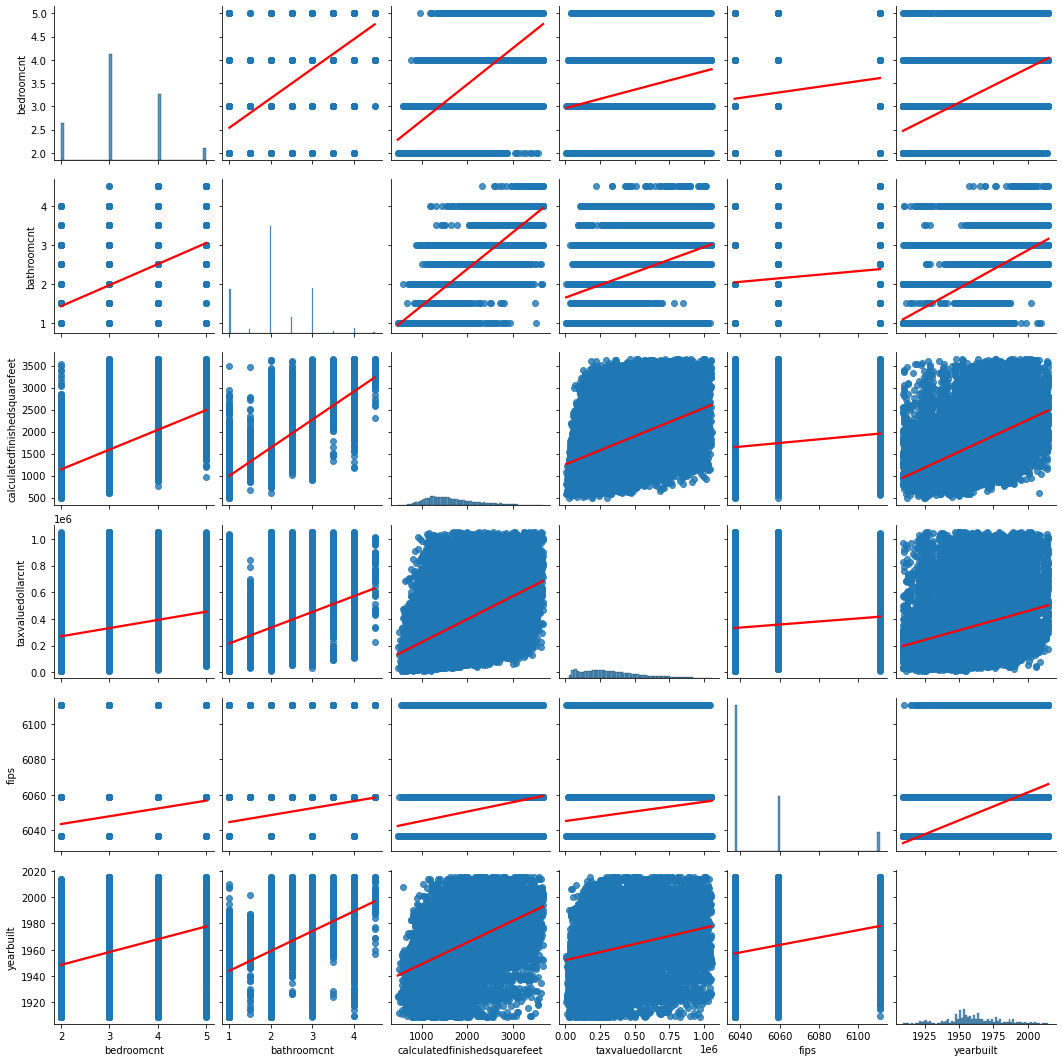

In [10]:
plot_variable_pairs(train)

In [11]:
continuous_vars = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt',]
categorical_vars = ['bathroomcnt', 'bedroomcnt', 'yearbuilt', 'fips', 'yearbuilt']

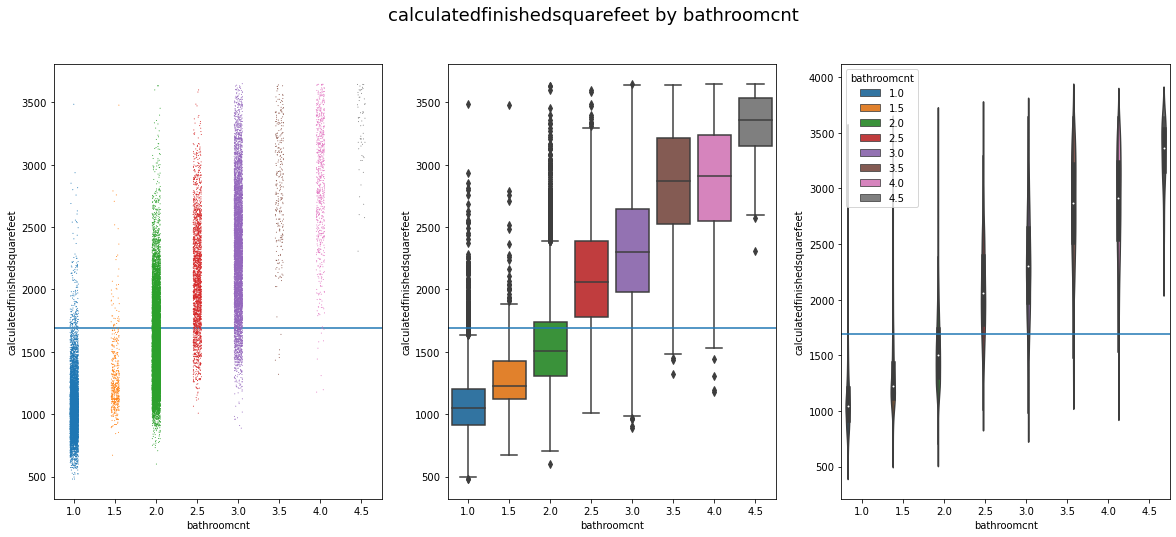

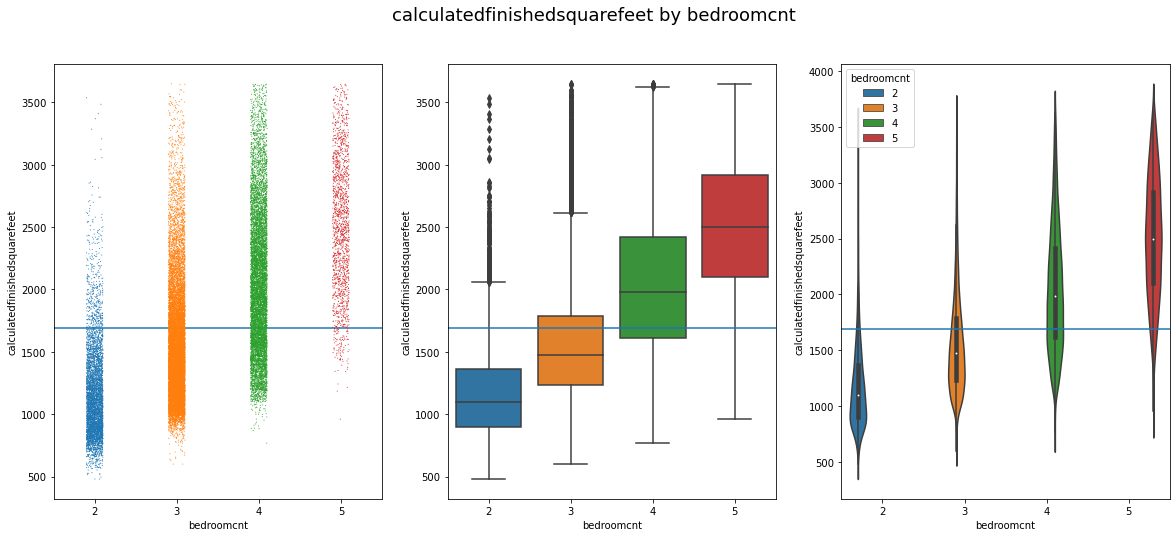

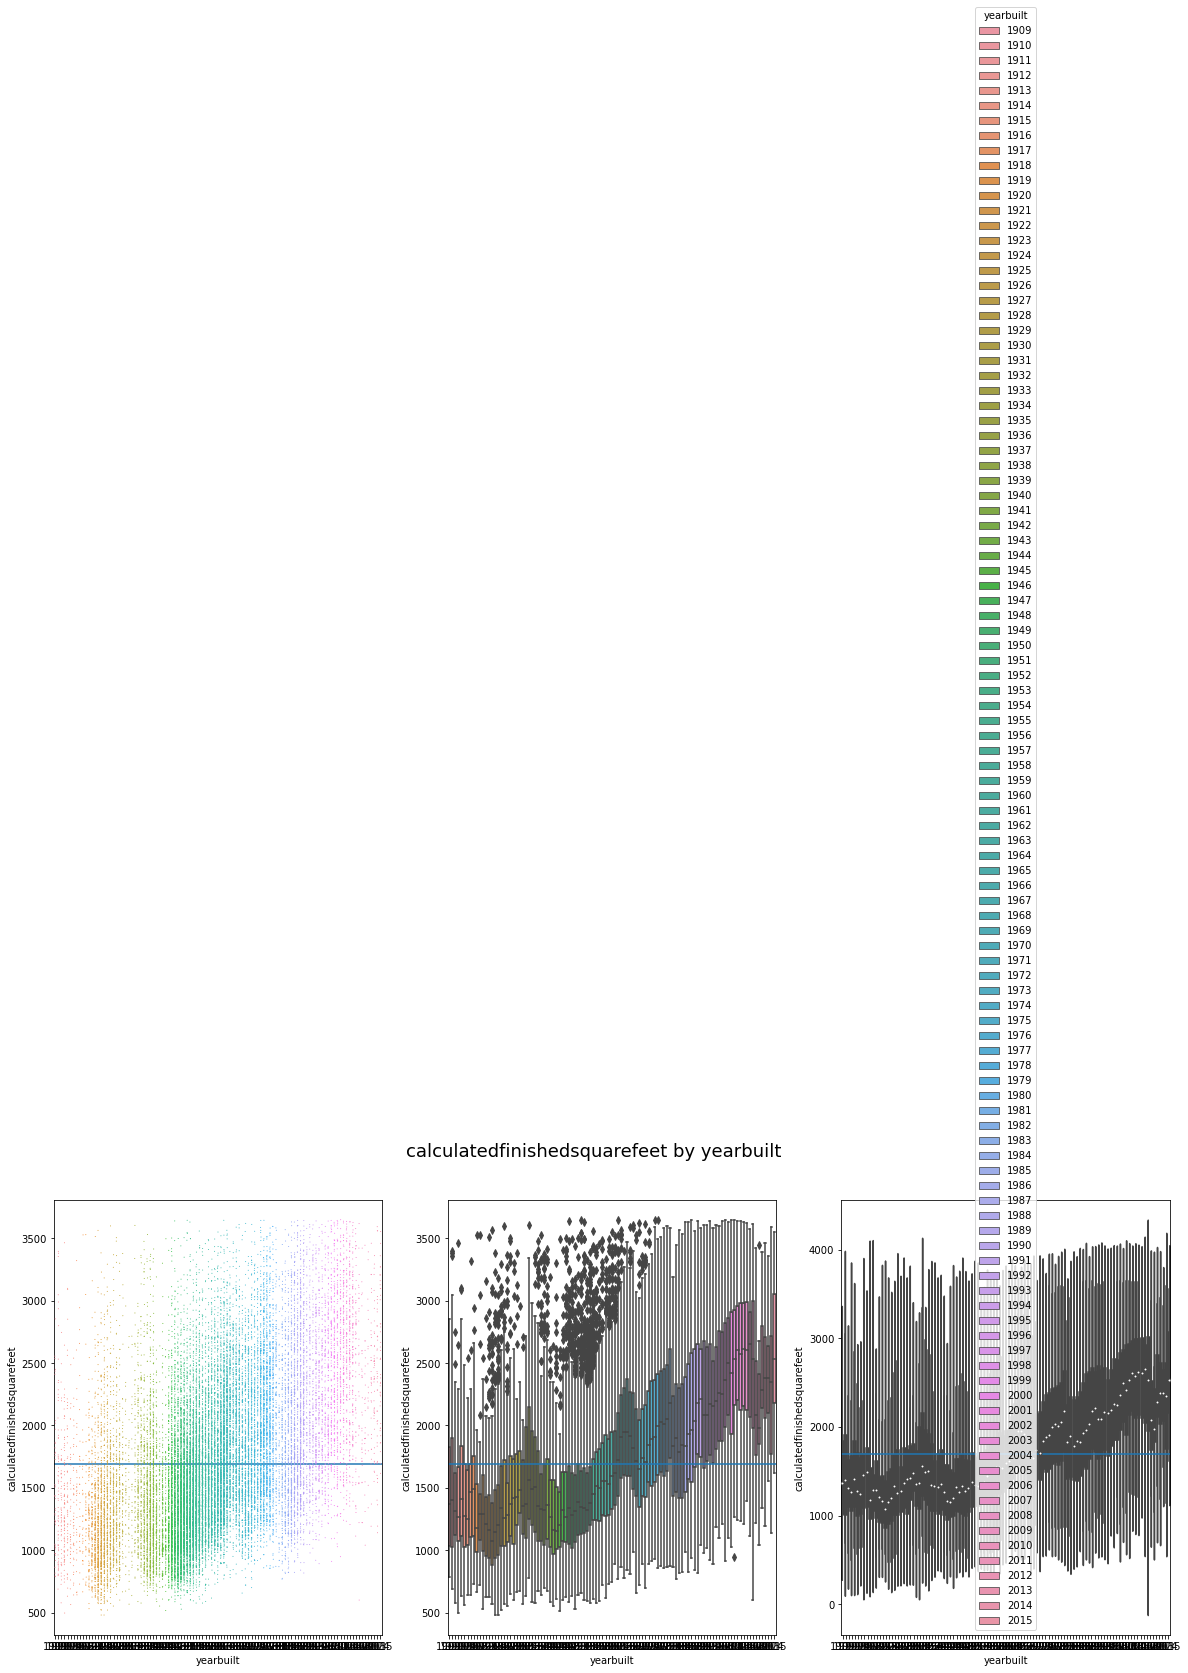

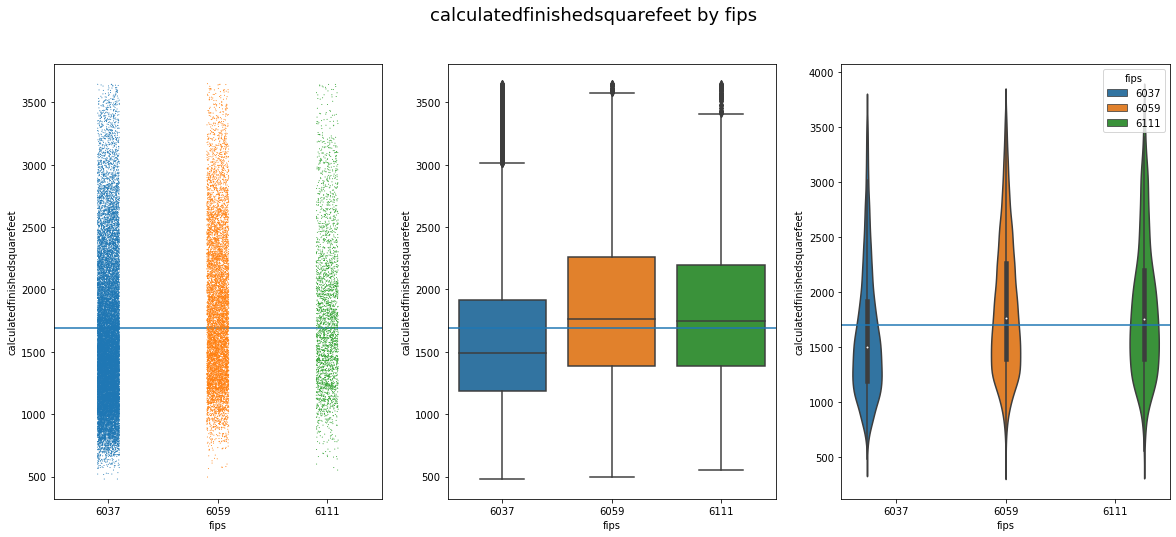

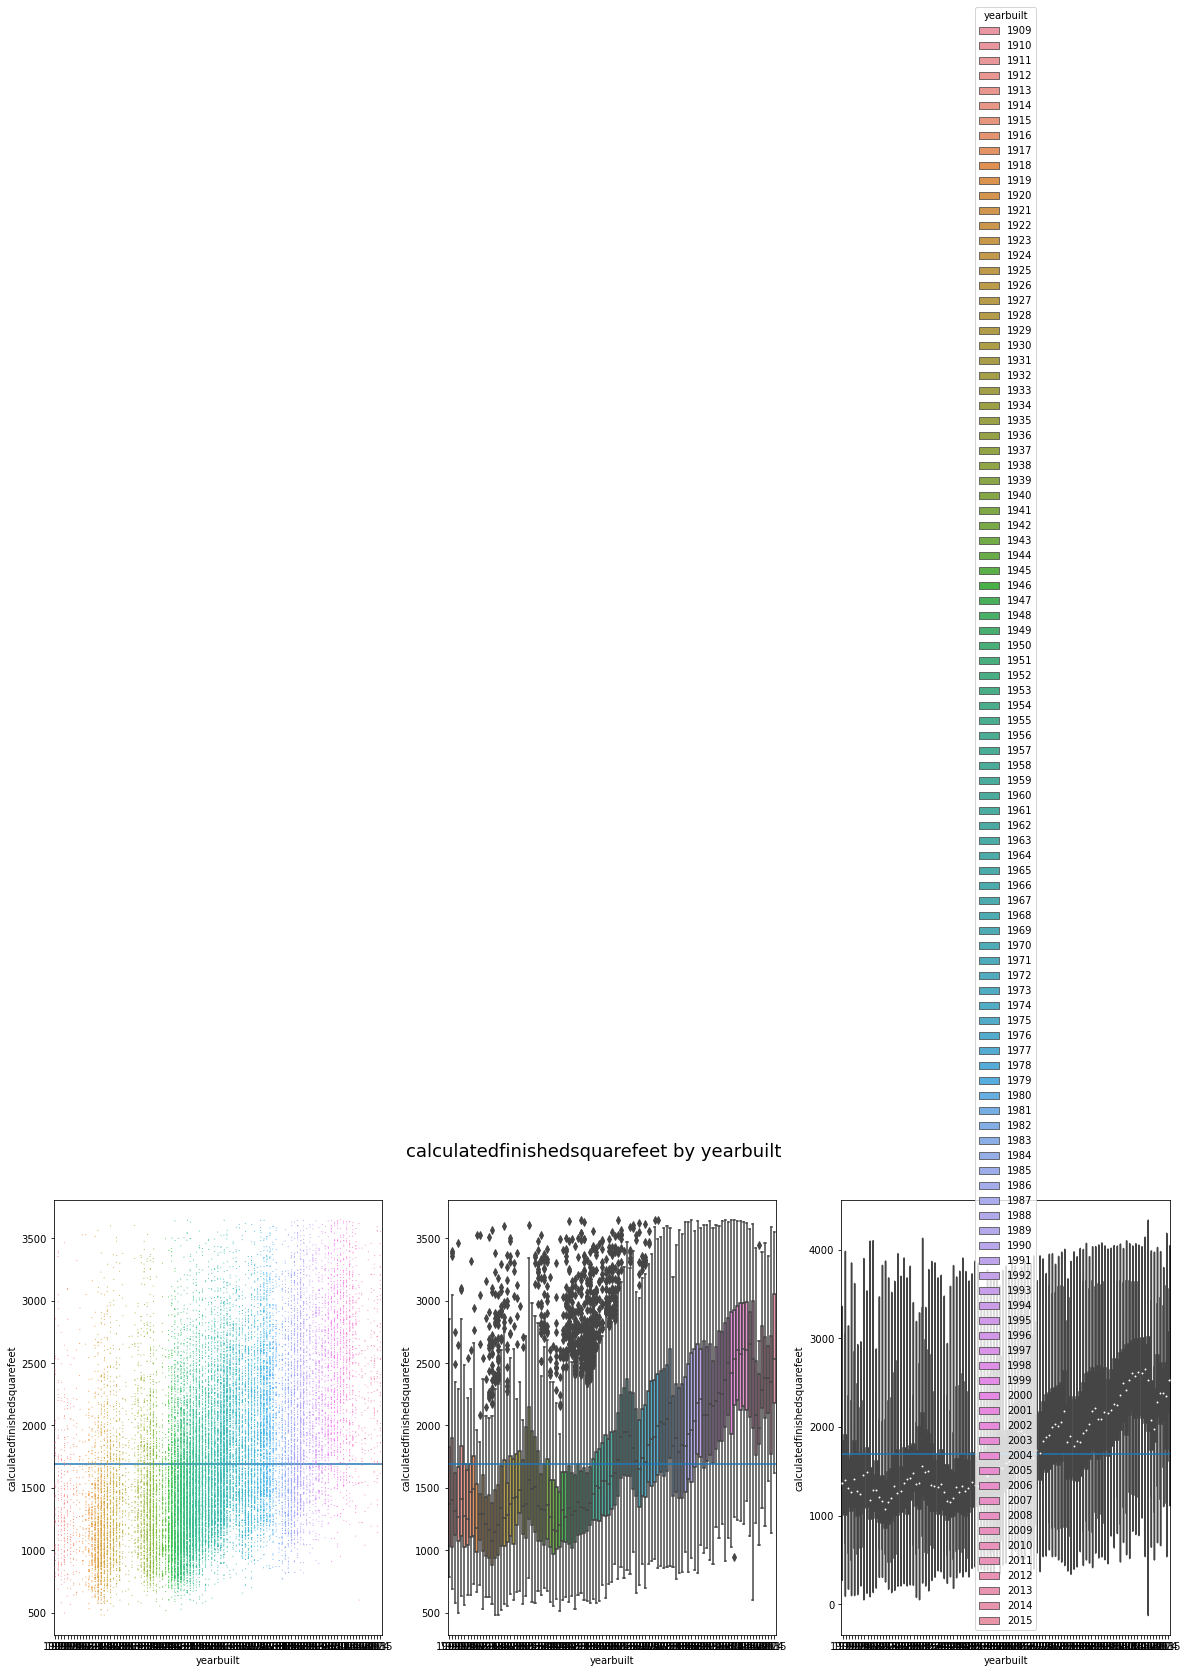

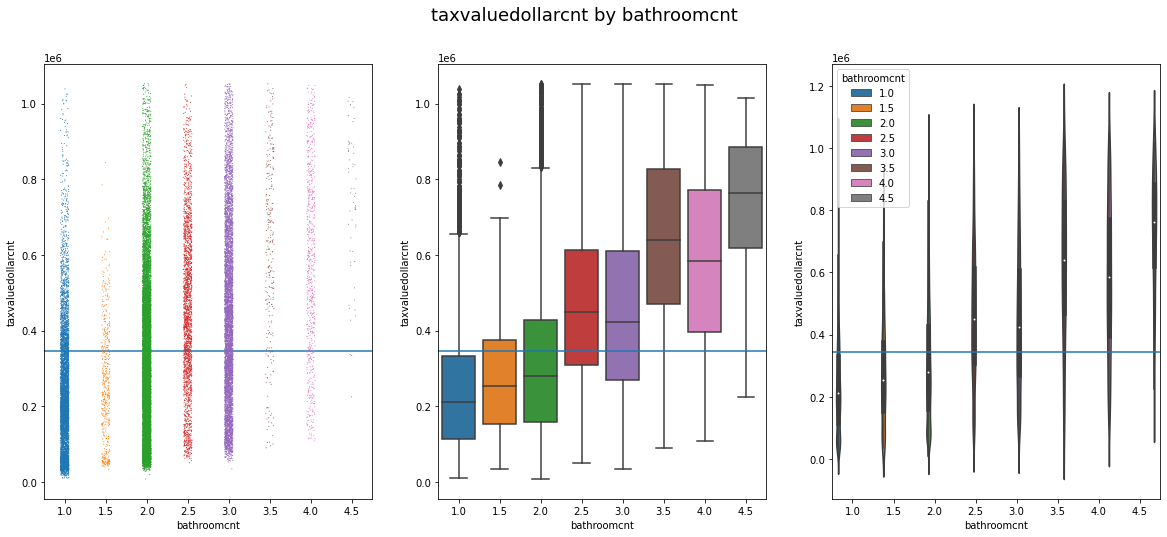

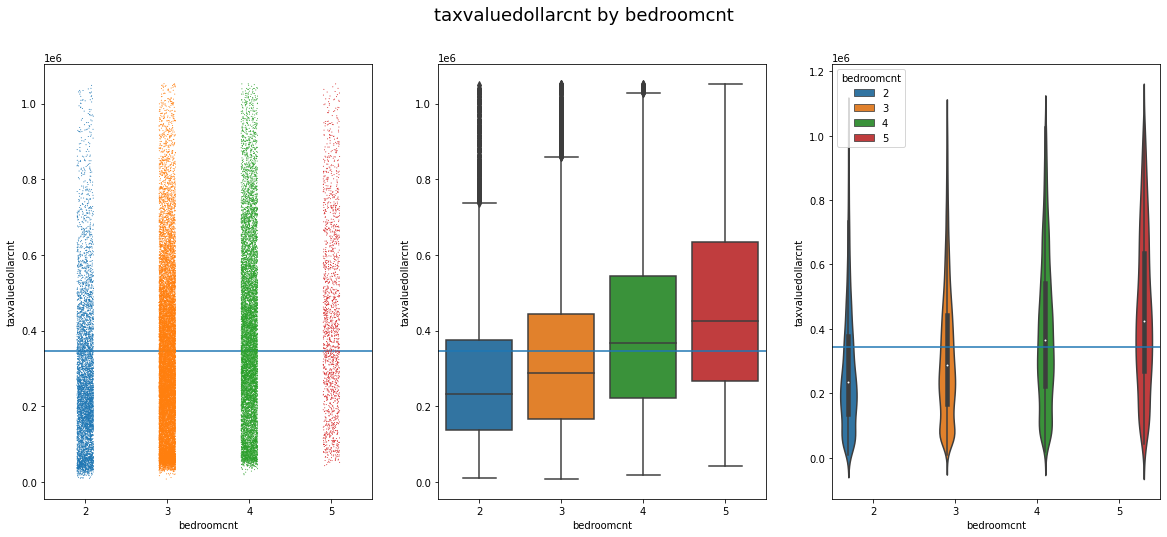

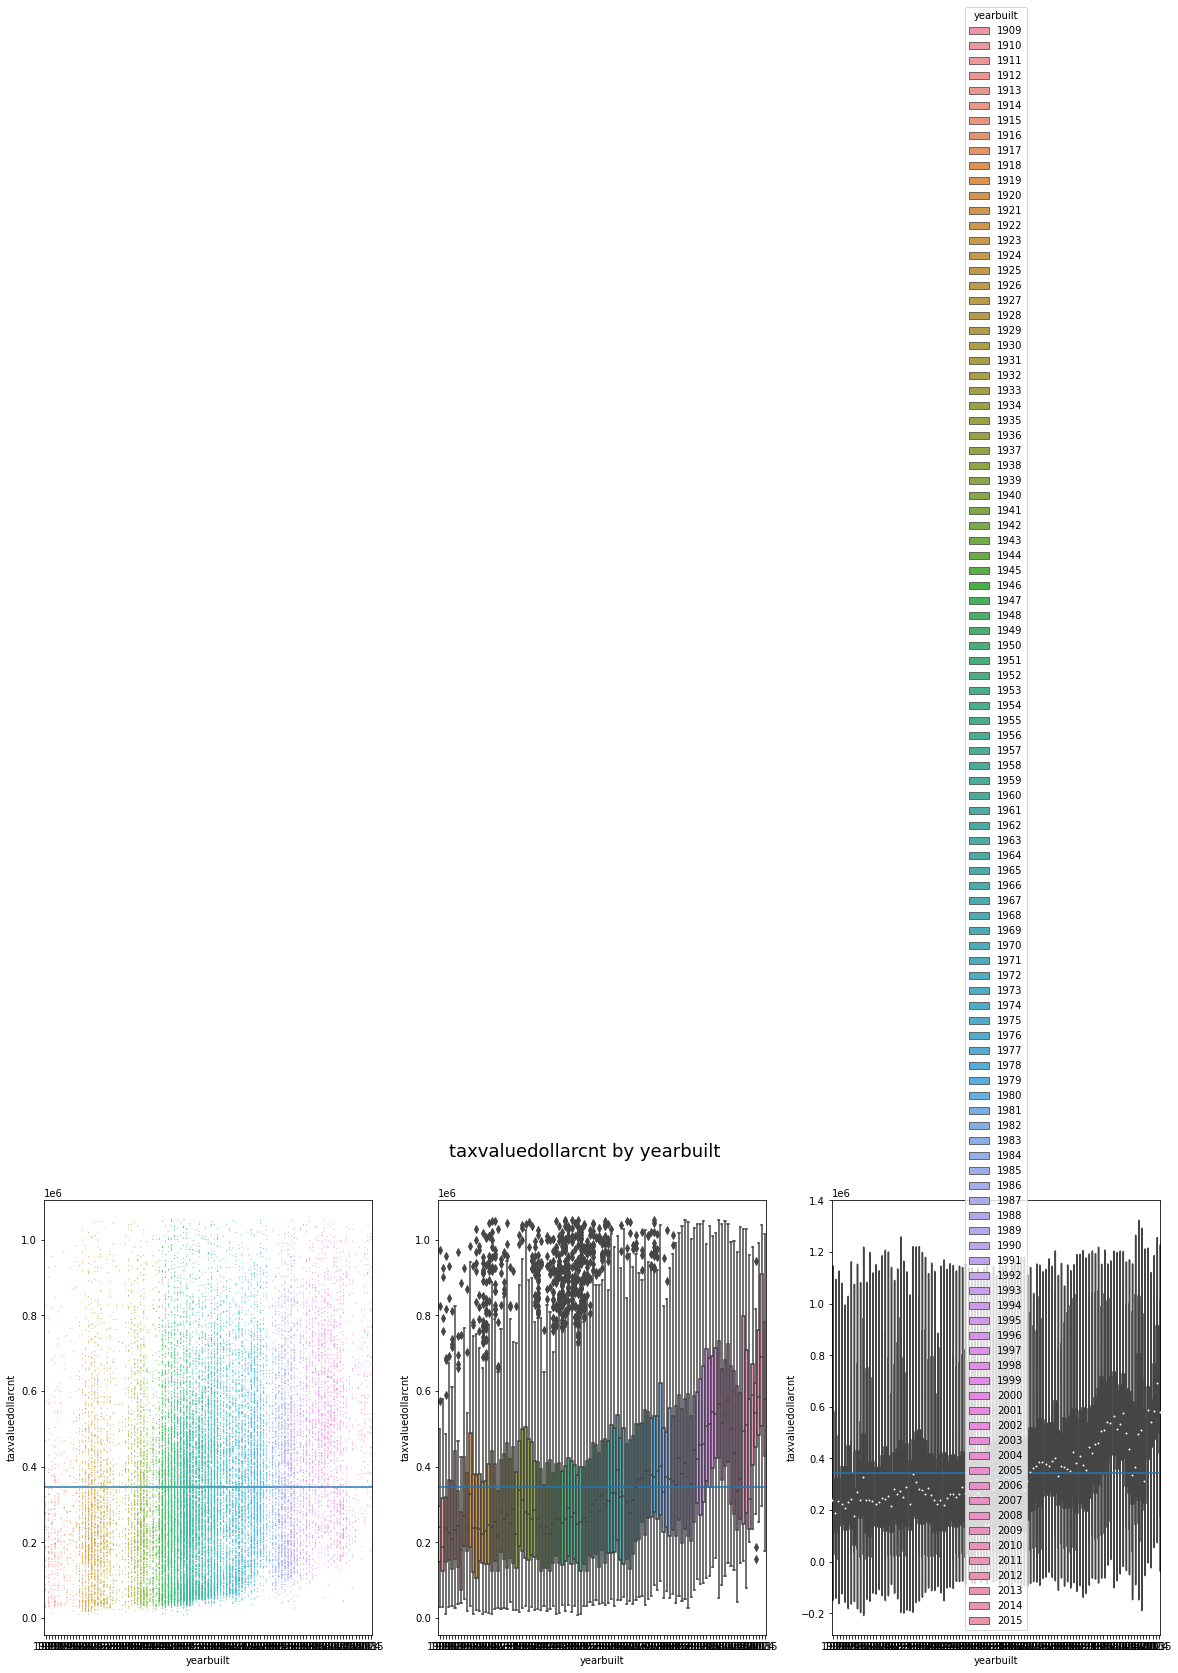

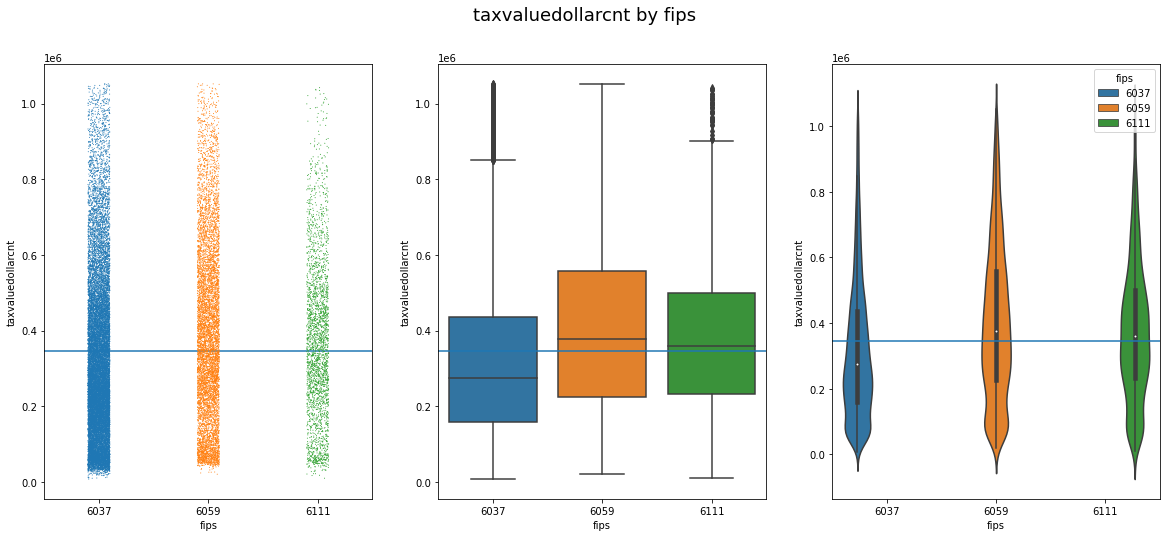

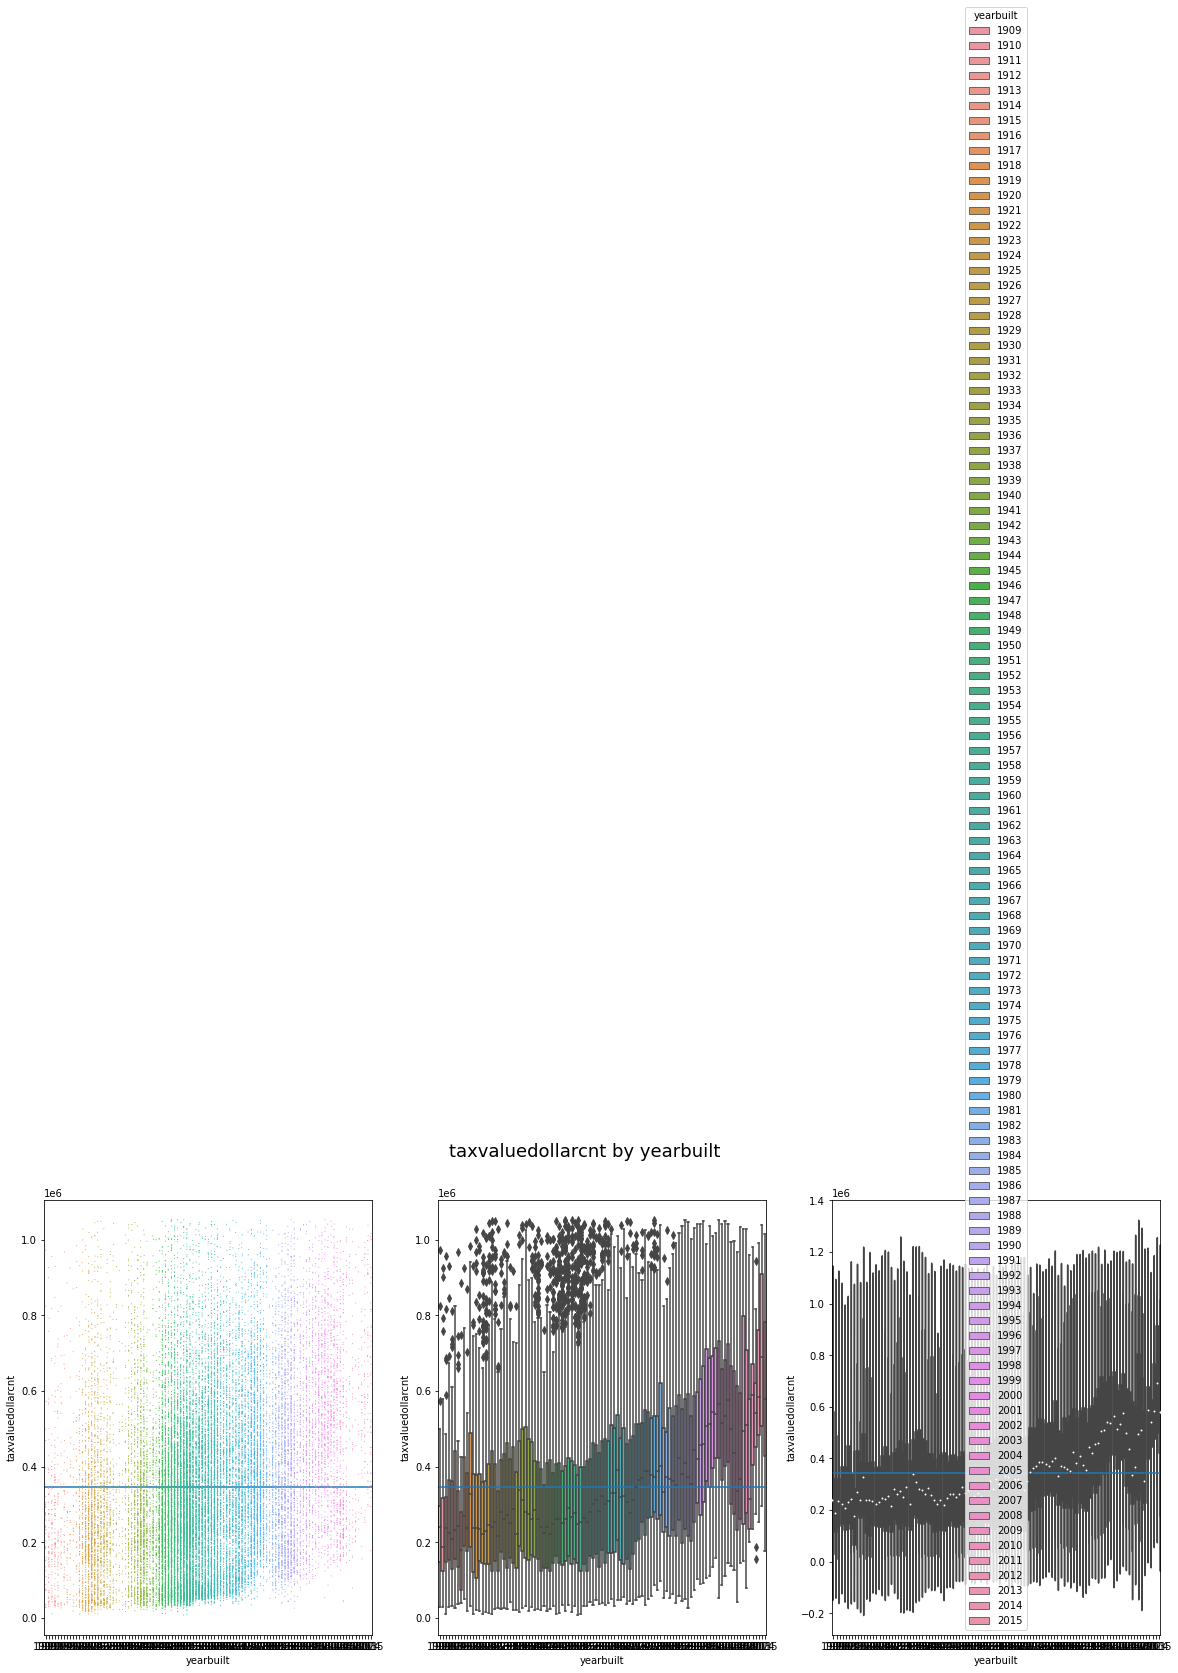

In [12]:
plot_categorical_and_continuous_vars(train, categorical_vars, continuous_vars)